In [29]:
from keras import layers
from keras import Input
from keras.models import Model
from keras import applications
from keras.utils import plot_model

In [3]:
text_size = 256
answer_zise = 500

In [7]:
text_input = Input(shape=(10), name='text')
text_embedded = layers.Embedding(text_size, 64)(text_input)
encoded_text = layers.GRU(32)(text_embedded)

In [21]:
photo_input = Input(shape=(64,64,3), name='photo')
resnet_photo = applications.ResNet50(weights=None, include_top=False)(photo_input)
encoded_photo = layers.GlobalAveragePooling2D()(resnet_photo)

In [24]:
merged = layers.concatenate([encoded_text, encoded_photo], axis=-1)

In [25]:
subject = layers.Dense(10, activation='softmax')(merged)
relation = layers.Dense(12, activation='softmax')(merged)
object_ = layers.Dense(24, activation='softmax')(merged)

In [26]:
model = Model(inputs=[text_input, photo_input], outputs=[subject, relation, object_])

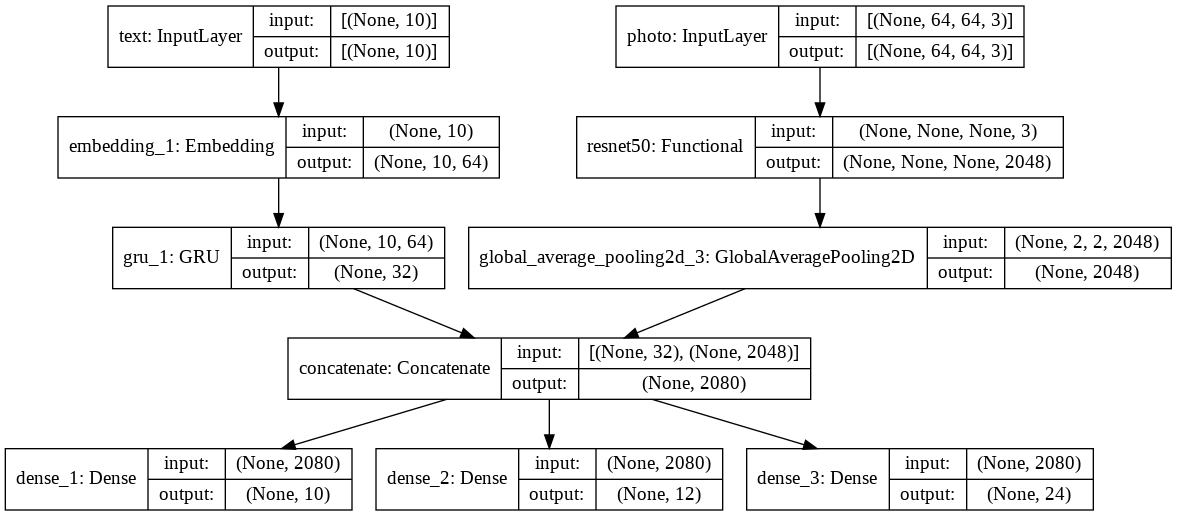

In [32]:
plot_model(model, show_shapes=True)